In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.metrics import confusion_matrix

In [6]:
df = pd.concat([
    pd.read_csv("csvs/second_half_worst.csv", index_col= 0)
])



def visulize_img(row):
    
    img = plt.imread(row.Path)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Label: {row.Label}, Pred: {row.Prediction}, Loss: {float(row.loss) :.2f}")
    plt.tight_layout()
    plt.show()

df["Prediction"] = df.pred_true.map({0:"Cat", 1:"Dog"})

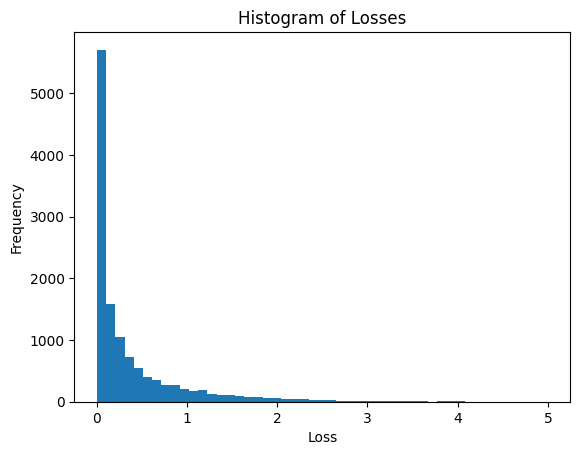

In [7]:
bins = np.linspace(0, 5, 50)  # 50 bins between 0 and 5, but you can adjust the number as desired

df.loss.plot.hist(bins=bins)
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.title('Histogram of Losses')
plt.show()

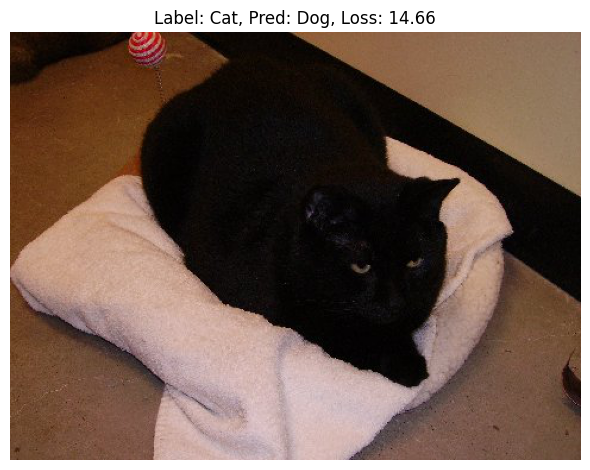

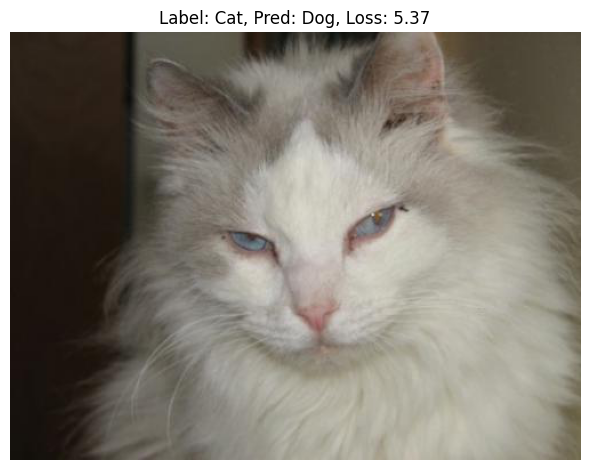

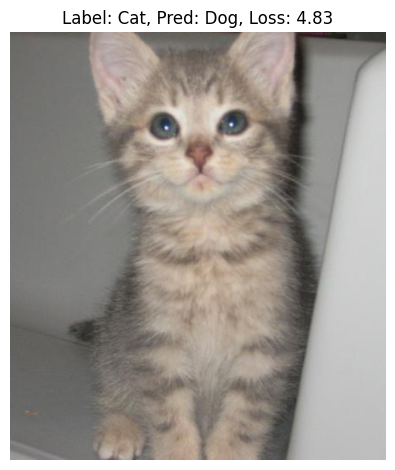

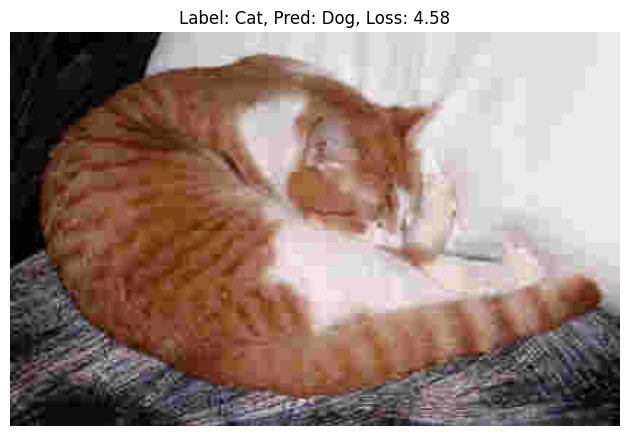

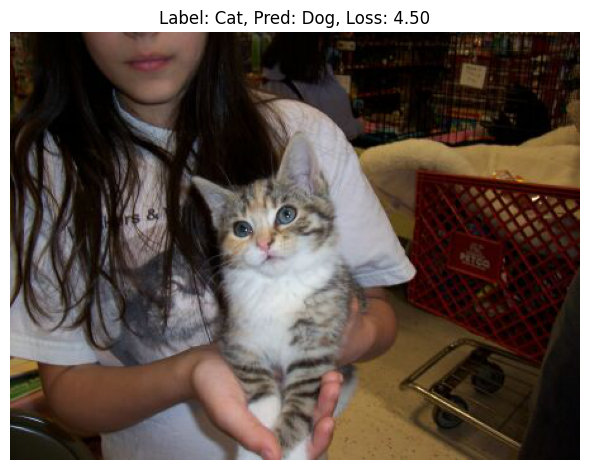

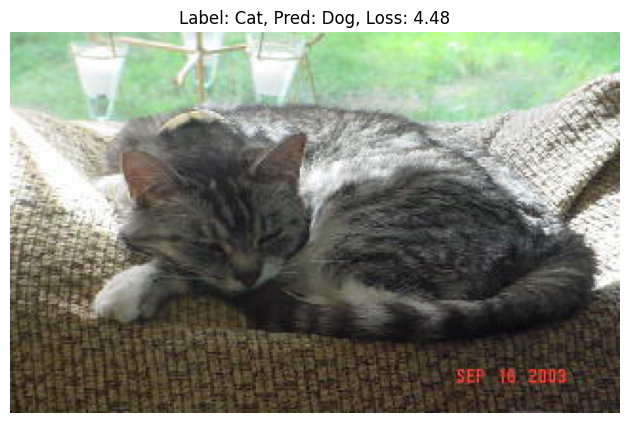

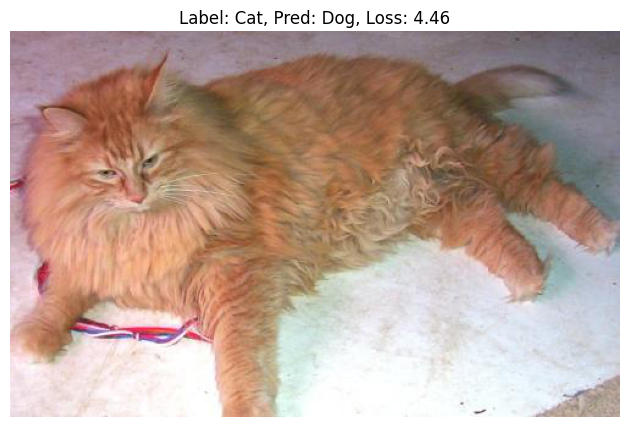

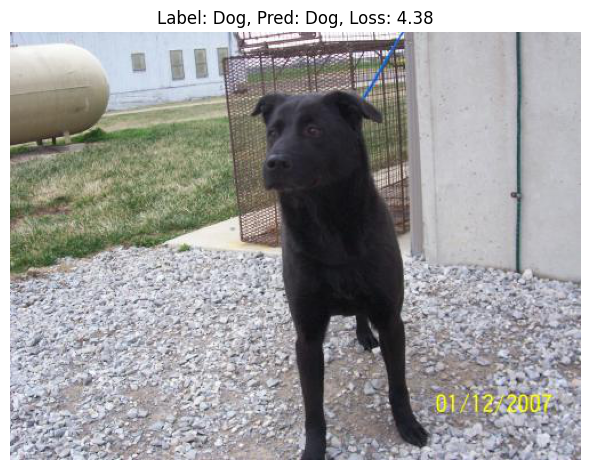

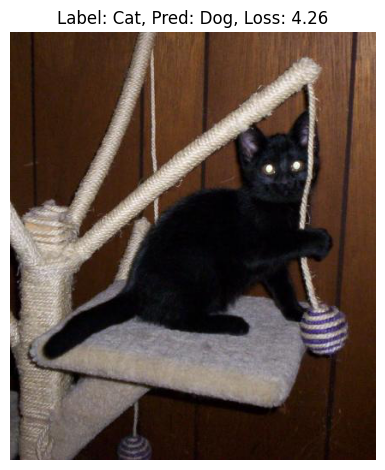

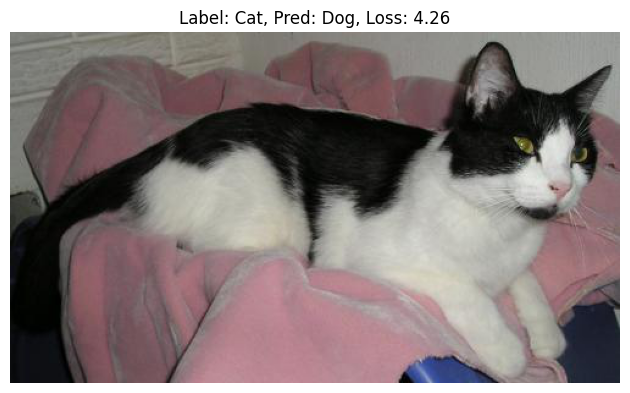

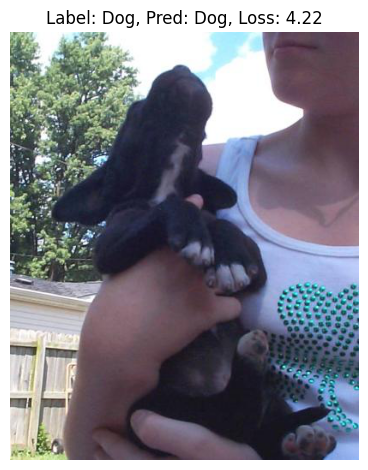

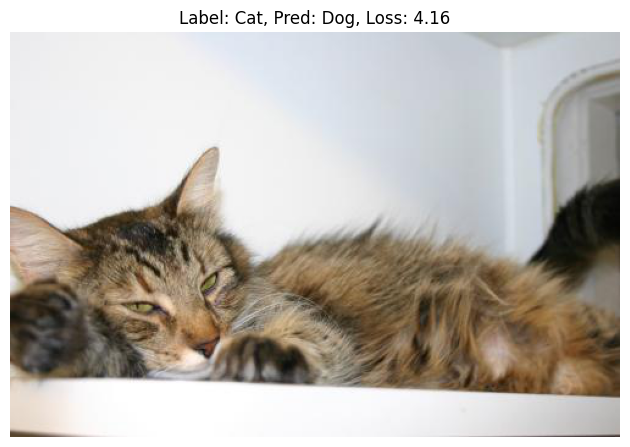

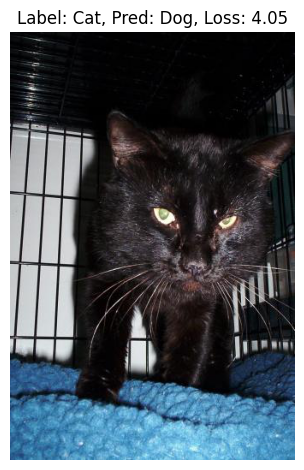

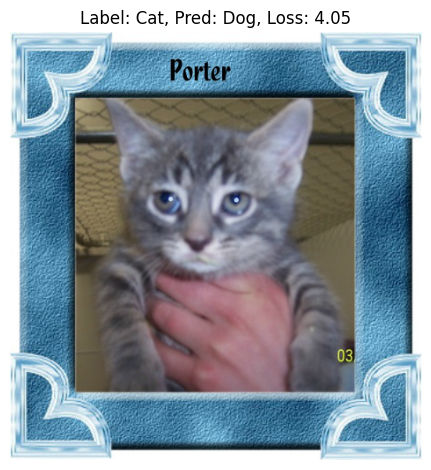

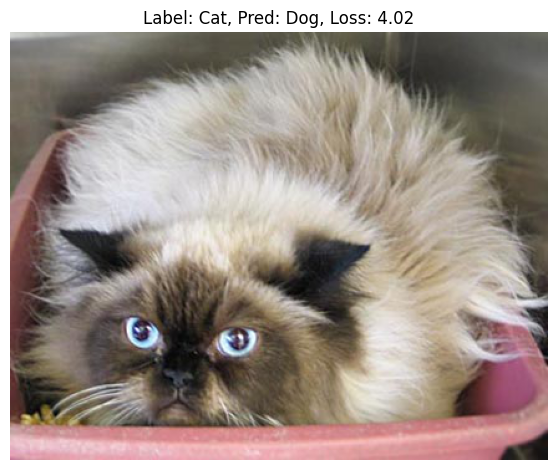

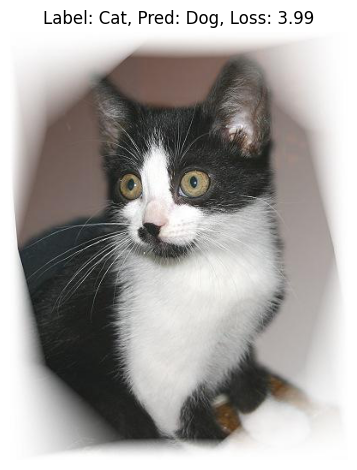

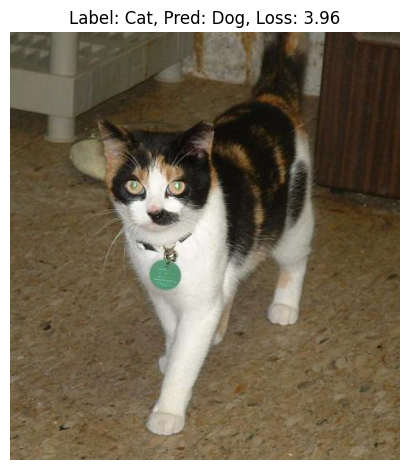

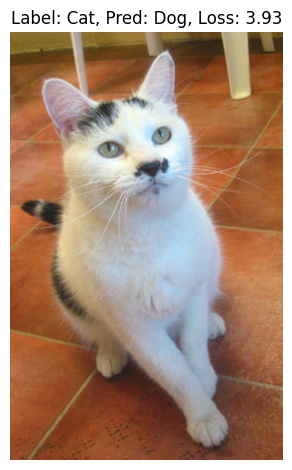

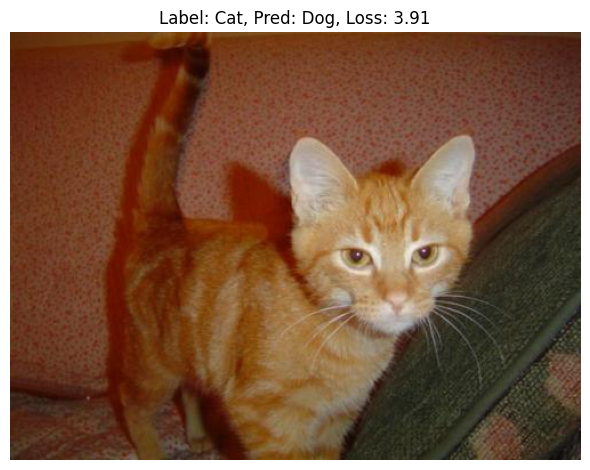

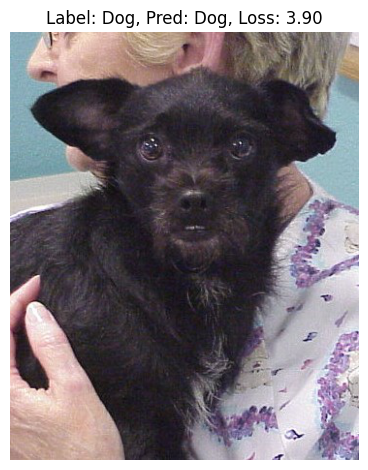

In [8]:
worst = df.sort_values("loss", ascending= False)

for i in range(20):
    
    visulize_img(worst.iloc[i])

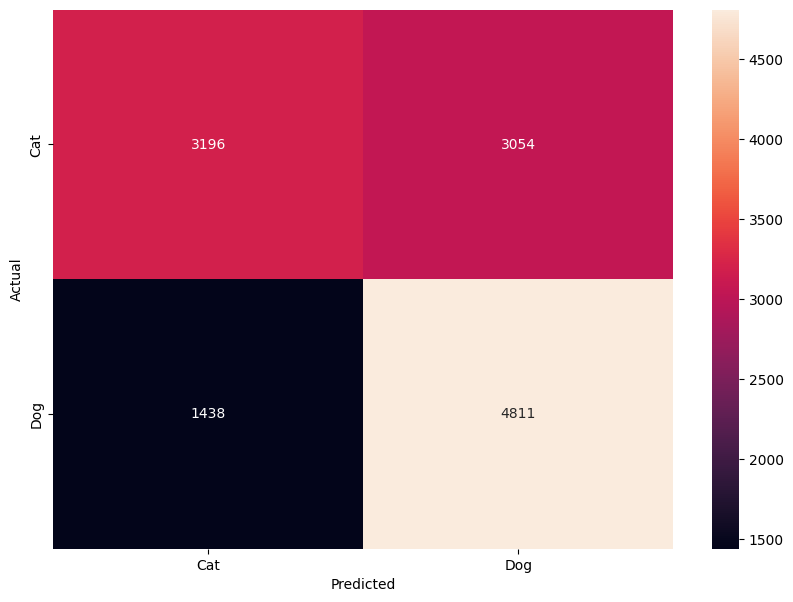

In [9]:
cm = confusion_matrix(df['Label'], df['Prediction'])

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()